In [4]:
import numpy as np
import platform
import tempfile
import os
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
# necessite scikit-image 
from skimage import io as skio
from scipy import ndimage

#Pour affichage rapide
import cv2

# POUR LA MORPHO
import skimage.morphology as morpho  
import skimage.feature as skf
from scipy import ndimage as ndi

In [5]:
# Calcul du périmètre

def my_perimeter(im):
    se=morpho.disk(1)
    dil=morpho.dilation(im,se)
    diff=dil-im
    ta=np.nonzero(diff)
    return ta
    

def histogram(im):
    
    nl,nc=im.shape
    
    hist=np.zeros(256)
    
    for i in range(nl):
        for j in range(nc):
            hist[im[i][j]]=hist[im[i][j]]+1
            
    for i in range(256):
        hist[i]=hist[i]/(nc*nl)
        
    return(hist)

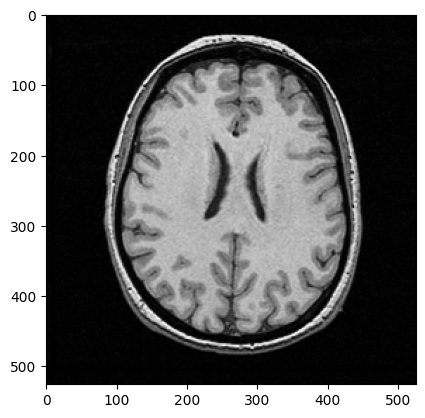

In [6]:
im=skio.imread('images/cerveau.tif')
mask=np.zeros((len(im),len(im[0])))

plt.figure('Image originale')
plt.imshow(im,cmap='gray')
plt.show()

In [28]:
### paramètres
# position du germe initial
y0=360
x0=130
# seuil du prédicat
thresh=2
# voisinage pour le calcul de la moyenne et de l'écart-type locaux
rayon=3

# Masque initial
mask[y0,x0]=255

ext=im[y0-rayon:y0+rayon+1,x0-rayon:x0+rayon+1]
m0=np.mean(ext)
s0=np.std(ext)

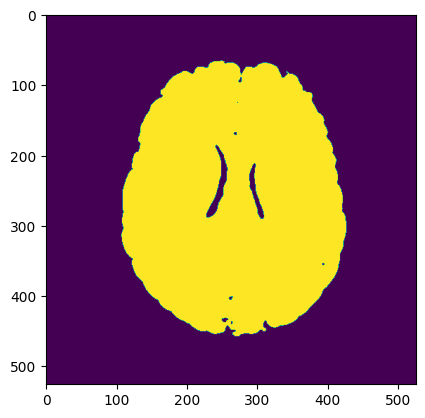

In [29]:
# Boucle tant qu'il y a des changements.

modif=1
iter = 0 

while modif >  0:

    iter=iter+1
        
    modif=0

    # Calcul du périmètre du masque
    
    per=my_perimeter(mask)

    # Boucle sur les points du périmètre

    for i in range (0 , len(per[0])):

        y=per[0][i]
        x=per[1][i]
        ext=im[y-rayon:y+rayon+1,x-rayon:x+rayon+1]
        m=np.mean(ext)
        s=np.std(ext)

        # Prédicat

        if np.abs(m0-m) < thresh * s0 :
            mask[y][x]=255
            modif=1

    #cv2.imshow('frame',mask)
    #if cv2.waitKey(1) & 0xFF == ord('q'):
    #    break


plt.figure('masque')
plt.imshow(mask)
plt.show()

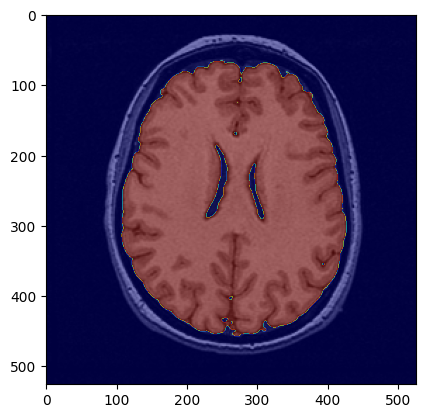

In [30]:
se=morpho.disk(1)
dil=morpho.dilation(mask,se)
diff=dil-mask

plt.figure('superposition')
plt.imshow(im, cmap='gray') # I would add interpolation='none'
plt.imshow(mask, cmap='jet', alpha=0.5) # interpolation='none'
plt.show()
